In [4]:
# Created: 20250104

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 2: Calculate Relative Vigor Index (RVI)
def calculate_rvi(data, period=4):
    # Calculate Numerator (Close - Open) and Denominator (High - Low)
    data['Numerator'] = data['Close'] - data['Open']
    data['Denominator'] = data['High'] - data['Low']
    
    # Calculate SMA for both Numerator and Denominator
    data['SMA Numerator'] = data['Numerator'].rolling(window=period).mean()
    data['SMA Denominator'] = data['Denominator'].rolling(window=period).mean()
    
    # Calculate RVI
    data['RVI'] = data['SMA Numerator'] / data['SMA Denominator']
    
    # Calculate Signal Line (4-period SMA of RVI)
    data['Signal Line'] = data['RVI'].rolling(window=period).mean()
    
    return data

In [6]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply RVI calculation
    data = calculate_rvi(data)
    
    # Step 3: Plot Close Price and RVI
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot RVI
    plt.subplot(2, 1, 2)
    plt.plot(data['RVI'], label='RVI (Relative Vigor Index)', color='green', linewidth=1.5)
    plt.plot(data['Signal Line'], label='Signal Line', color='orange', linestyle='--', linewidth=1.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f'Relative Vigor Index (RVI) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('RVI')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


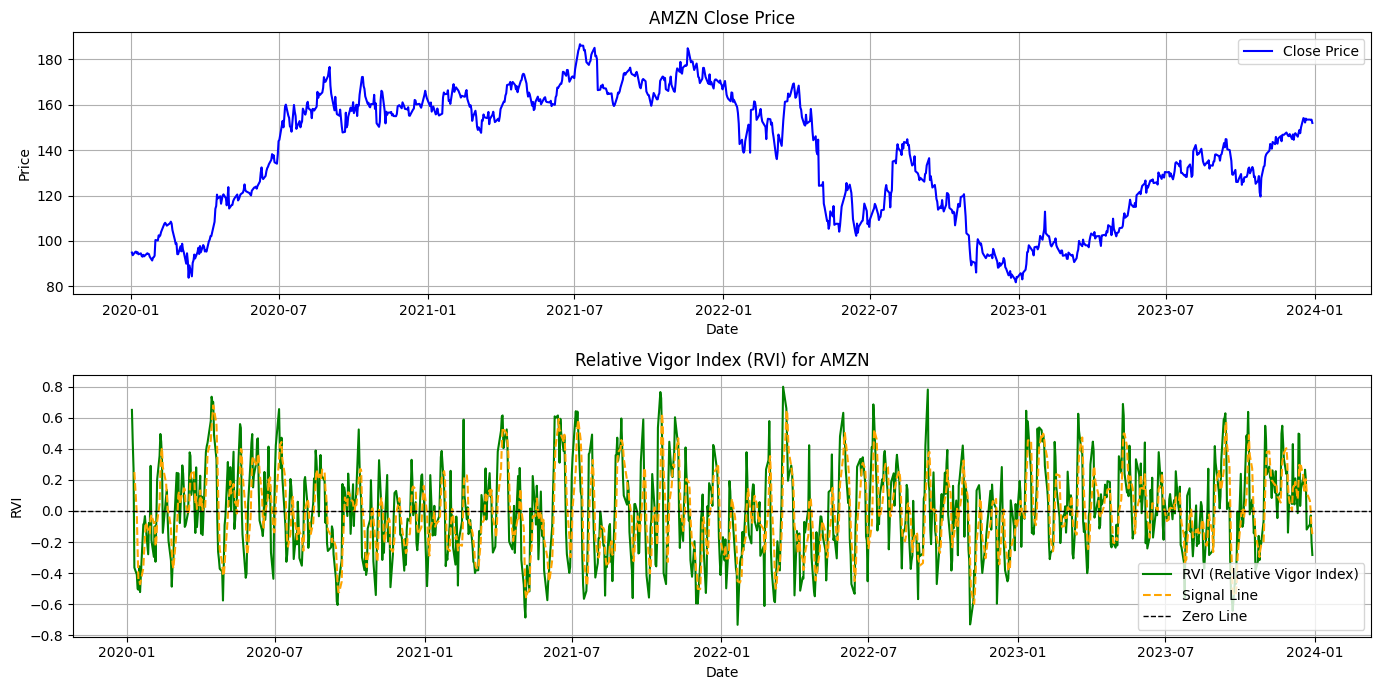

In [7]:
show_graph("AMZN")